Instructions

**When taking this exam, you agree to follow the Duke Honor Code.**

- This is a closed book exam. You can use the `help()` function, and the `?` prefix or suffix but are restricted to a SINGLE browser tab.
- All necessary imports are provided. You should not need to import any other packages.
- Answer all 5 questions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
from scipy import optimize as opt

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


**1**. (20 points)

- Find the matrix $A$ that results in rotating the standard vectors in $\mathbb{R}^2$ by 30 degrees counter-clockwise and stretches $e_1$ by a factor of 3 and contracts $e_2$ by a factor of $0.5$. 
- What is the inverse of this matrix? How you find the inverse should reflect your understanding.

The effects of the matrix $A$ and $A^{-1}$ are shown in the figure below:

![image](../data/vecs.png)

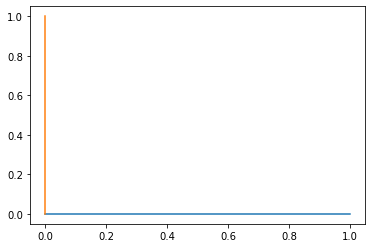

In [54]:
l2 = np.array([
    [1,0],
    [0,1]
])
plt.plot(*zip(np.zeros_like(l2[0,:]),l2[0,:]))
plt.plot(*zip(np.zeros_like(l2[1,:]),l2[1,:]))

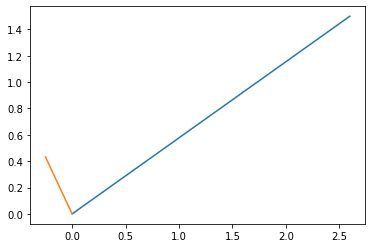

In [55]:
theta = np.pi/6
A = np.array([
    [3*np.cos(theta),3*np.sin(theta)],
    [-0.5*np.sin(theta),0.5*np.cos(theta)]
])
l2 = l2@A
plt.plot(*zip(np.zeros_like(l2[0,:]),l2[0,:]))
plt.plot(*zip(np.zeros_like(l2[1,:]),l2[1,:]))

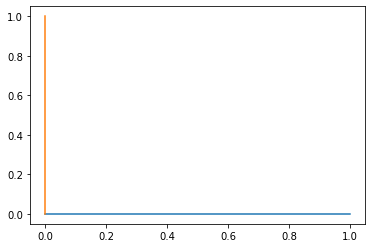

In [56]:
l2 = l2@la.inv(A)
plt.plot(*zip(np.zeros_like(l2[0,:]),l2[0,:]))
plt.plot(*zip(np.zeros_like(l2[1,:]),l2[1,:]))

In [57]:
A

array([[ 2.59807621,  1.5       ],
       [-0.25      ,  0.4330127 ]])

**2**. (20 points)

- Given the DNA sequence below, create a $4 \times 4$ transition matrix $A$ where $A[i,j]$ is the probability of the base $j$ appearing immediately after base $i$. Note that a *base* is one of the four letters `a`, `c`, `t` or `g`. The letters below should be treated as a single sequence, broken into separate lines just for formatting purposes. You should check that row probabilities sum to 1. 
- Find the steady state distribution of the 4 bases from the row stochastic transition matrix - that is the, the values of $x$ for which $x^TA = x$ (You can solve this as a set of linear equations). Hint: you need to add a constraint on the values of $x$. 

```
gggttgtatgtcacttgagcctgtgcggacgagtgacacttgggacgtgaacagcggcggccgatacgttctctaagatc
ctctcccatgggcctggtctgtatggctttcttgttgtgggggcggagaggcagcgagtgggtgtacattaagcatggcc
accaccatgtggagcgtggcgtggtcgcggagttggcagggtttttgggggtggggagccggttcaggtattccctccgc
gtttctgtcgggtaggggggcttctcgtaagggattgctgcggccgggttctctgggccgtgatgactgcaggtgccatg
gaggcggtttggggggcccccggaagtctagcgggatcgggcttcgtttgtggaggagggggcgagtgcggaggtgttct
```

In [59]:
txt = """gggttgtatgtcacttgagcctgtgcggacgagtgacacttgggacgtgaacagcggcggccgatacgttctctaagatc
ctctcccatgggcctggtctgtatggctttcttgttgtgggggcggagaggcagcgagtgggtgtacattaagcatggcc
accaccatgtggagcgtggcgtggtcgcggagttggcagggtttttgggggtggggagccggttcaggtattccctccgc
gtttctgtcgggtaggggggcttctcgtaagggattgctgcggccgggttctctgggccgtgatgactgcaggtgccatg
gaggcggtttggggggcccccggaagtctagcgggatcgggcttcgtttgtggaggagggggcgagtgcggaggtgttct"""
txt = "".join(txt.split())

In [60]:
alpha = np.array(["a","c","t","g"])
base = np.array([[txt[i],txt[i+1]] for i in range(len(txt)-1)])

In [61]:
A = np.zeros(16).reshape(4,4)
for i, first in enumerate(alpha):
    for j, second in enumerate(alpha):
        idx = (base[:,0] == first) & (base[:,1] == second)
        A[i,j] = sum(idx)
A = A/A.sum(axis=1)[:,np.newaxis]

In [62]:
A

array([[0.09433962, 0.20754717, 0.24528302, 0.45283019],
       [0.16666667, 0.23809524, 0.26190476, 0.33333333],
       [0.10204082, 0.2244898 , 0.2755102 , 0.39795918],
       [0.14634146, 0.18902439, 0.22560976, 0.43902439]])

In [63]:
x = np.random.rand(4).reshape(-1,1)
x = x/sum(x)
x

array([[0.45838488],
       [0.31340152],
       [0.04559173],
       [0.18262187]])

In [27]:
xt = x.T@np.linalg.matrix_power(A,100)
xt = xt/sum(xt)

In [64]:
np.allclose(xt.T,xt@A)

True

**3**. (20 points) 

We observe some data points $(x_i, y_i)$, and believe that an appropriate model for the data is that

$$
f(x) = ax^2 + bx^3 + c\sin{x}
$$

with some added noise. Find optimal values of the parameters $\beta = (a, b, c)$ that minimize $\Vert y - f(x) \Vert^2$

using gradient descent with RMSProp (no bias correction) and starting with an initial value of $\beta = \begin{bmatrix}1 & 1 & 1\end{bmatrix}$. Use a learning rate of 0.01 and 10,000 iterations. This should take a few seconds to complete. (25 points)

Plot the data and fitted curve using `matplotlib`.

Data
```
x = array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])
```

In [29]:
x = np.array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = np.array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])

In [30]:
def f(x,y,b):
    return b[0]*x**2 + b[1]*x**3 + b[2]*np.sin(x) - y
def grad_m(X,y,b):
    return X.T@X@b - X.T@y

In [34]:
X = np.c_[x**2, x**3, np.sin(x)]
b = [1,1,1]
a = 0.01 #learning rate
max_iter = 10000
beta = 0.9
eps = 1e-10
v = 0

In [35]:
for i in range(max_iter):
    v = v*beta + grad_m(X,y,b)**2*(1-beta)
    b = b - a*grad_m(X,y,b)/(eps + np.sqrt(v))
b

array([ 2.98759014, -0.20383227, 10.19524689])

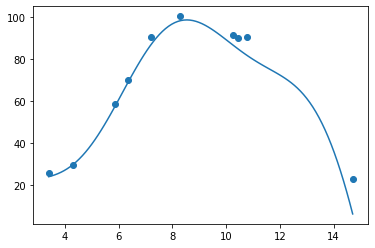

In [36]:
xp = np.linspace(x.min(),x.max(),100)
Xp = np.c_[xp**2, xp**3,np.sin(xp)]
yp = Xp@b
plt.scatter(x,y)
plt.plot(xp,yp)

**4**. (20 points)

Consider the following system of equations:

$$\begin{align*}
2x_1& - x_2&    +x_1    &=& 6\\
-x_1& +2x_2& -  x_3 &=& 2\\
 x_1   &  -x_2& + x_3 &=& 1
\end{align*}$$

1. Write the system in matrix form $Ax=b$ and define these in numpy or scipy.
2. Show that $A$ is positive-definite
3. Use the appropriate matrix decomposition function in numpy and back-substitution to solve the system. Remember to use the structure of the problem to determine the appropriate decomposition.

In [68]:
A = np.array([
    [2,-1,1],
    [-1,2,-1],
    [1,-1,1]
])
b = np.array([6,2,1])

In [69]:
lam,vec = la.eig(A)
lam.real>0

array([ True,  True,  True])

all eigenvalues are positive which is indicator of positive definite

In [70]:
P,L,U = la.lu(A)
y = la.solve_triangular(L,P.T@b,lower=True)
x = la.solve_triangular(U,y)
x

array([ 5.,  3., -1.])

**5**. (20 points)

Let

$A = \left(\begin{matrix}2 & -1 &1\\-1& 2& -1 \\1&-1& 1
\end{matrix}\right) \;\;\;\;\;\;\textrm{ and }\;\;\;\;\;\; v = \left(\begin{matrix}1 \\ 1 \\2\end{matrix}\right)$

Find $w$ such that $w$ is conjugate to $v$ under $A$. You may use *basic* linear algebra in scipy or numpy - i.e. matrix products.

$w^{T}Av = 0$

In [71]:
v = np.array([1,1,2])
w = np.random.rand(3)
w = w/sum(w)

In [72]:
w = w - (v@A@w)/(v.T@A@v)*v
w = w/sum(w)
w

array([ 1.04178029,  1.01392676, -1.05570705])

In [73]:
np.allclose(w.T@A@v,0)

True